参考：[Predict with pre-trained SSD models](https://gluon-cv.mxnet.io/build/examples_detection/demo_ssd.html)

In [1]:
%matplotlib inline
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

## SSD 

载入网络权重：

In [2]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True)

载入数据：

In [3]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/street_small.jpg?raw=true',
                          path='images/street_small.jpg')
x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 512)


`net` 返回的变量均是 `(batch_size, num_bboxes, 1)` 格式的：

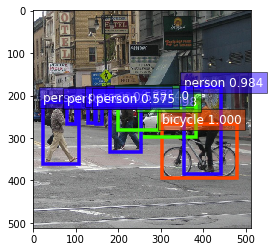

In [4]:
class_IDs, scores, bounding_boxes = net(x)
ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [5]:
class_IDs.shape

(1, 100, 1)

# faster rcnn

In [6]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

In [7]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='images/biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

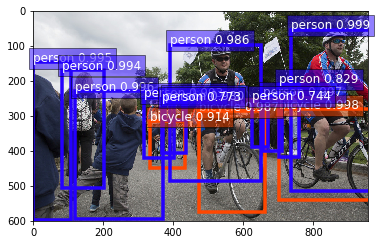

In [8]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

# Yolo v3

In [9]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [10]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='images/dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 683)


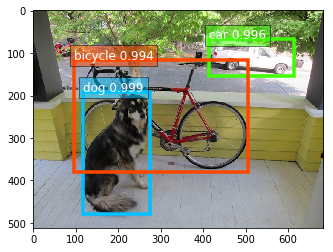

In [11]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()